In [327]:
import numpy as np
import pandas as pd

from keras.layers import LSTM
from __future__ import print_function
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Dense, Activation

In [328]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import math, time
from sklearn.metrics import mean_squared_error

In [338]:
data = pd.read_csv('C:/Users/juanj/Documents/GitHub/Aprendizaje-Profundo/temperatura.csv')

data.head()

,ID,FECHA,TMP
0,1,01/01/2023,13.9
1,2,01/01/2023,11.7
2,3,01/01/2023,9.4
3,4,01/01/2023,8.1
4,5,01/01/2023,7.7


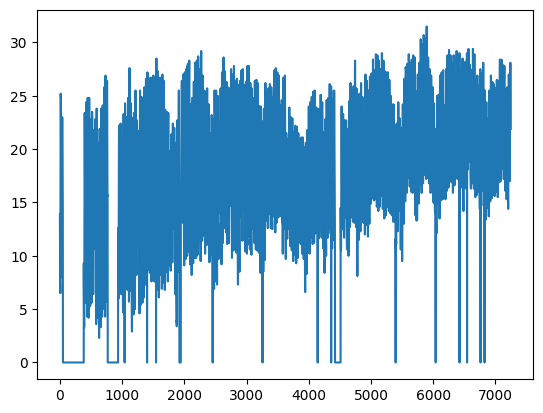

In [339]:
plt.plot(data['TMP'])
plt.show()

In [ ]:
len(data)

In [ ]:
#normalizamos

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
data = min_max_scaler.fit_transform(data['TMP'].values.reshape(-1,1))

In [ ]:
data.shape

In [ ]:
data[0:10]

In [ ]:
train_size =int(len(data)* 0.7)
test_size =len(data)- train_size
train, test =data[0:train_size,:], data[train_size:len(data),:]
print(len(train),len(test))

In [ ]:
def create_matrix(data, look_back=5):
    dataX, dataY = [],[]
    for i in range(len(data)-look_back-1):
        a = data[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(data[i + look_back,0])
    return np.array(dataX), np.array(dataY)

In [ ]:
x_train, y_train = create_matrix(train, look_back=5)
x_test, y_test = create_matrix(test, look_back=5)

In [ ]:
display(x_train)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [ ]:
x_train

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [ ]:
look_back = 5
model = Sequential()
model.add(LSTM(20, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mape', optimizer='adam')
model.fit(x_train, y_train, epochs=20, batch_size=1, verbose=2)


In [ ]:
trainPrediction = model.predict(x_train)
testPrediction = model.predict(x_test)

In [ ]:
trainPrediction

In [ ]:
trainPrediction = min_max_scaler.inverse_transform(trainPrediction)
trainY = min_max_scaler.inverse_transform([y_train])
testPrediction = min_max_scaler.inverse_transform(testPrediction)
testY = min_max_scaler.inverse_transform([y_test])

In [ ]:
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPrediction)+look_back,:] = trainPrediction

In [ ]:
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPrediction)+(look_back*2)+1:len(data)-1,:] = testPrediction

In [ ]:
plt.plot(min_max_scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()